# Анализ данных (EDA) для набора Forest Cover Type

In [77]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Добавляем путь к скриптам
sys.path.append(os.path.abspath('../scripts'))

from preprocessing_feature_engineering import load_and_preprocess_data, split_and_scale
from model_selection import (
    train_models_with_gridsearch,
    evaluate_models,
    plot_confusion_matrix,
    plot_learning_curve,
    save_best_model,
    update_readme
)
from predict import predict_and_save

## Загрузка и анализ данных

In [ ]:

# Загружаем данные
path_train = '../data/train.csv'
try:
    df = pd.read_csv(path_train)
    print('Размер данных:', df.shape)
    print('\nПервые 5 строк:')
    display(df.head())
    print('\nРаспределение классов:')
    print(df['Cover_Type'].value_counts(normalize=True))
    print('\nПропуски:')
    print(df.isnull().sum())
except FileNotFoundError:
    print(f"Ошибка: Файл {path_train} не найден")

Размер данных: (50120, 55)

Первые 5 строк:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5



Распределение классов:
Cover_Type
2    0.576776
1    0.202634
5    0.048204
7    0.043097
3    0.043097
6    0.043097
4    0.043097
Name: proportion, dtype: float64

Пропуски:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7             

## Сравнение train/test:


Сравнение данных:
train.csv shape: (50120, 55)
test.csv shape: (530892, 55)
Train columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Ty

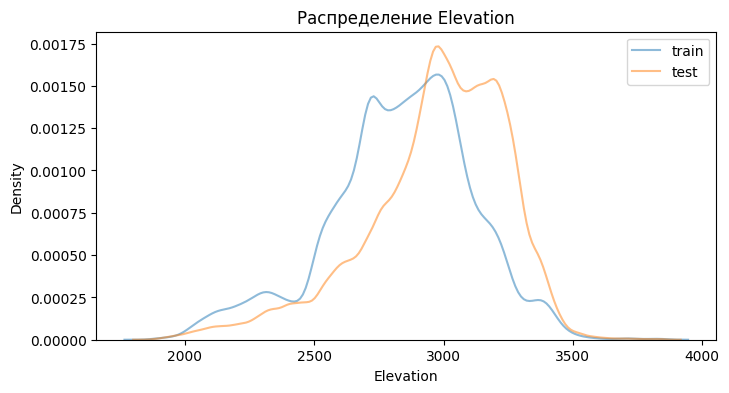

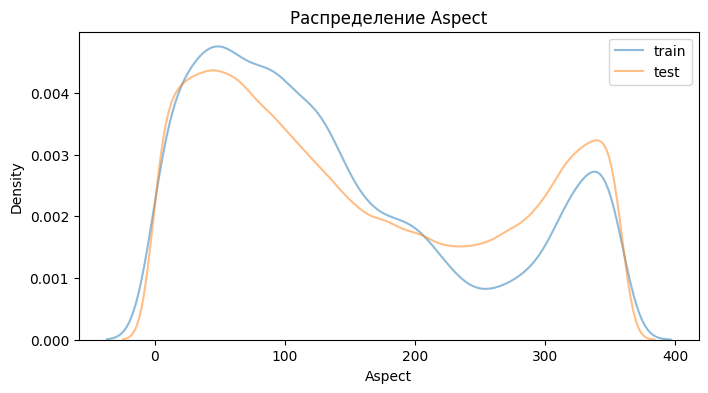

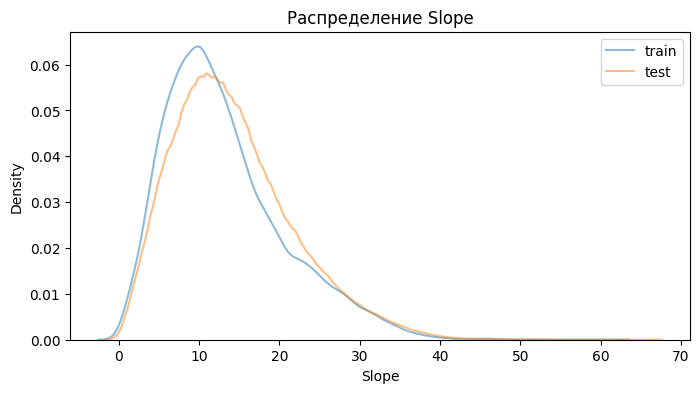

In [79]:

try:
    test_df = pd.read_csv('../data/test.csv')
    print('\nСравнение данных:')
    print(f'train.csv shape: {df.shape}')
    print(f'test.csv shape: {test_df.shape}')
    print('Train columns:', df.columns.tolist())
    print('Test columns:', test_df.columns.tolist())
    
    # Проверка пропусков
    print('\nПропуски в test.csv:')
    print(test_df.isnull().sum())
    
    # Сравнение распределений
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if 'Cover_Type' in numeric_cols:
        numeric_cols = numeric_cols.drop('Cover_Type')
    
    os.makedirs('../results/plots', exist_ok=True)
    for col in numeric_cols[:3]:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[col], label='train', alpha=0.5)
        sns.kdeplot(test_df[col], label='test', alpha=0.5)
        plt.title(f'Распределение {col}')
        plt.legend()
        plt.savefig(f'../results/plots/distribution_{col}.png')
        plt.show()
except FileNotFoundError:
    print("test.csv не найден")
except Exception as e:
    print(f"Ошибка при сравнении: {e}")

## Визуализация распределения классов

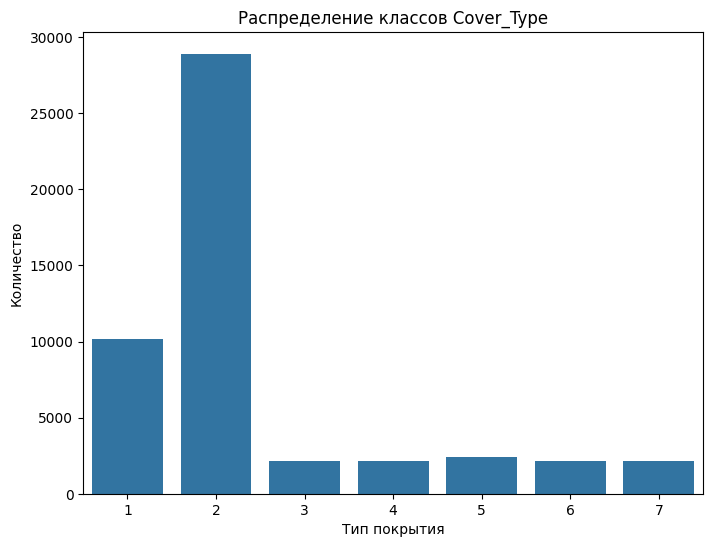

In [80]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем папку для графиков
os.makedirs('../results/plots', exist_ok=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Распределение классов Cover_Type')
plt.xlabel('Тип покрытия')
plt.ylabel('Количество')
plt.savefig('../results/plots/class_distribution.png')
plt.show()

## Корреляционный анализ

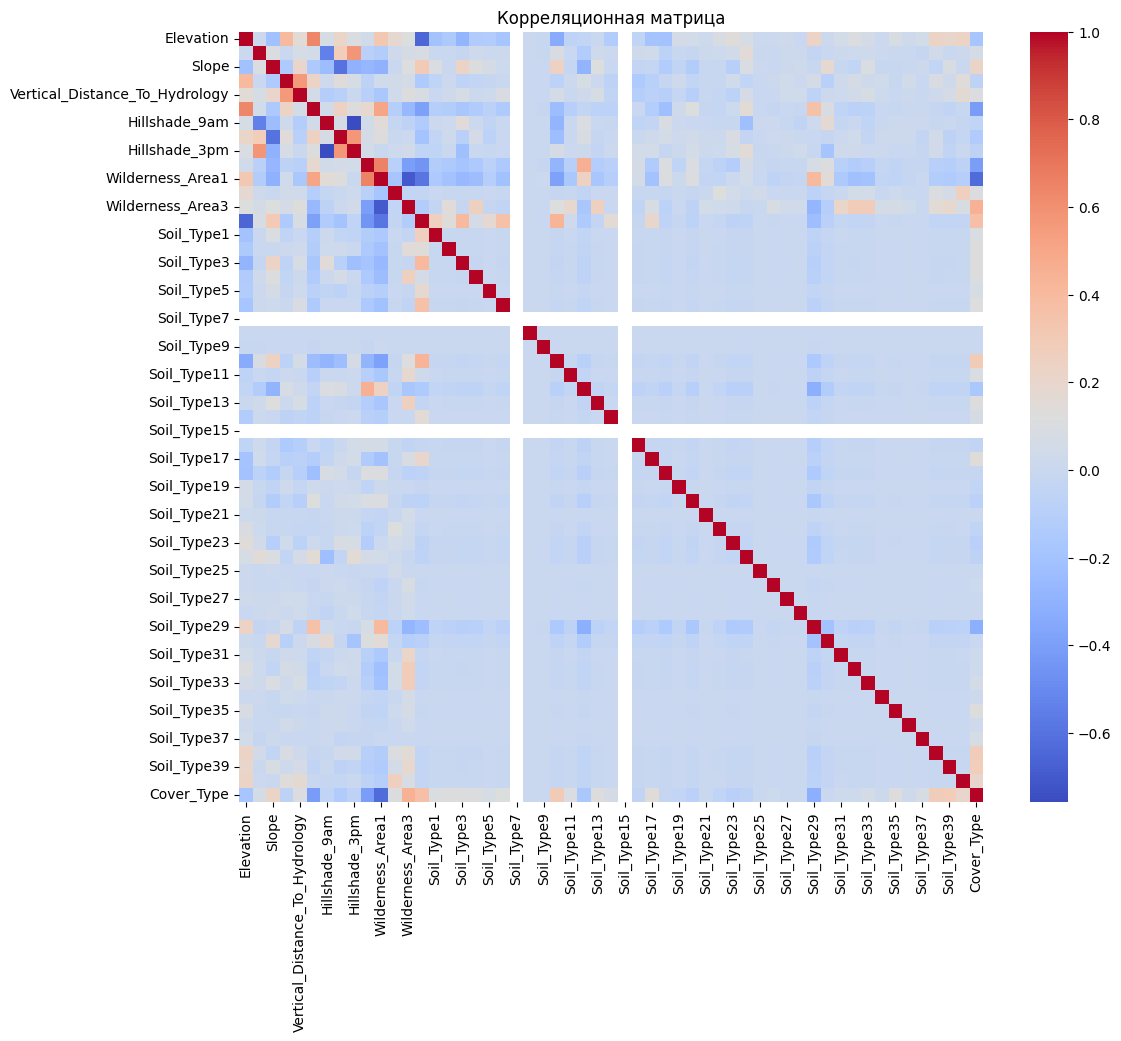

In [81]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Корреляционная матрица')
plt.savefig('../results/plots/correlation_matrix.png')
plt.show()

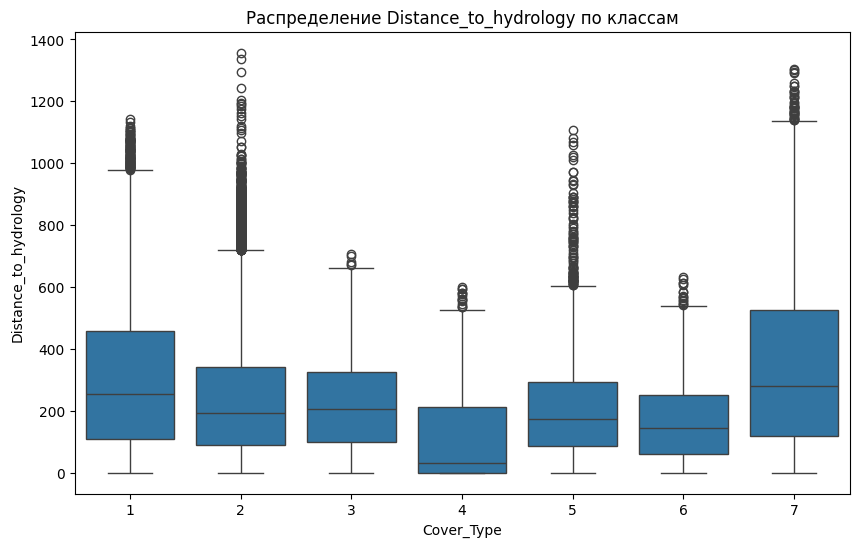

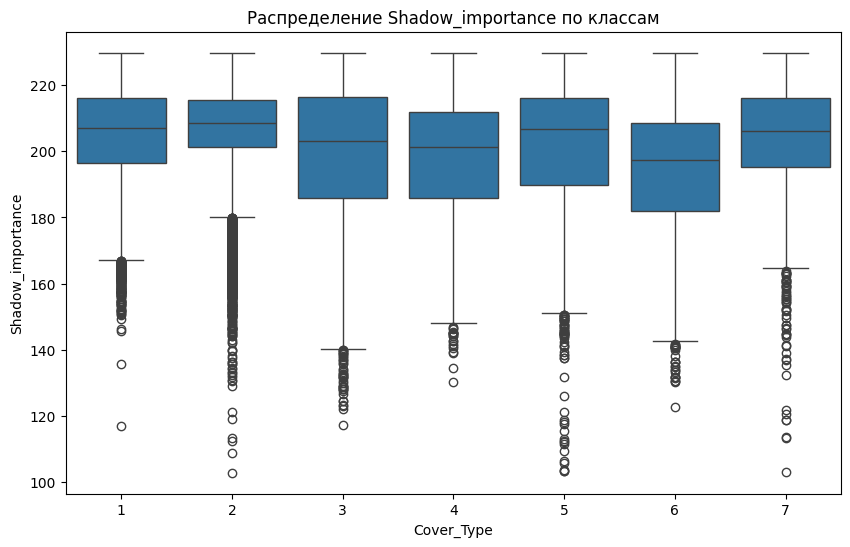

In [82]:
# Анализ новых признаков
df_processed = load_and_preprocess_data('../data/train.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Distance_to_hydrology', data=df_processed)
plt.title('Распределение Distance_to_hydrology по классам')
plt.savefig('../results/plots/distance_to_hydrology.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Shadow_importance', data=df_processed)
plt.title('Распределение Shadow_importance по классам')
plt.savefig('../results/plots/shadow_importance.png')
plt.show()

## Предобработка и обучение

In [83]:
# Предобработка
df_processed = load_and_preprocess_data(path_train)
X_train, X_test, y_train, y_test, scaler = split_and_scale(df_processed)
print('Размер тренировочного набора:', X_train.shape)
print('Размер тестового набора:', X_test.shape)

Размер тренировочного набора: (35084, 52)
Размер тестового набора: (15036, 52)


In [90]:
# Обучение моделей
results, best_model = train_models_with_gridsearch(X_train, y_train)
test_accuracies = evaluate_models(results, X_test, y_test)

Обучение Gradient Boosting...
Предупреждение: Train accuracy для Gradient Boosting = 0.9825, превышает 0.98
Gradient Boosting - Лучший CV Score: 0.9254
Лучшие параметры: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Train Accuracy: 0.9825

Обучение RandomForest...
Предупреждение: Train accuracy для RandomForest = 1.0000, превышает 0.98
RandomForest - Лучший CV Score: 0.9362
Лучшие параметры: {'clf__max_depth': None, 'clf__n_estimators': 200}
Train Accuracy: 1.0000

Обучение KNN...
KNN - Лучший CV Score: 0.8867
Лучшие параметры: {'clf__n_neighbors': 5}
Train Accuracy: 0.9291

Обучение SVM...
SVM - Лучший CV Score: 0.8500
Лучшие параметры: {'clf__C': 10, 'clf__kernel': 'rbf'}
Train Accuracy: 0.8611

Обучение LogisticRegression...
LogisticRegression - Лучший CV Score: 0.7965
Лучшие параметры: {'clf__C': 10, 'clf__solver': 'liblinear'}
Train Accuracy: 0.7975

🔍 Точность моделей на тестовом наборе:
Gradient Boosting: 0.9338
RandomForest: 0.9467
KNN: 0.8992
SVM: 

In [86]:
# Анализ лучшей модели
cm_df = plot_confusion_matrix(best_model, X_test, y_test)
print('Confusion Matrix:\n', cm_df)

plot_learning_curve(best_model, X_train, y_train, cv=5)

Confusion Matrix:
       1     2    3    4    5    6    7
1  2743   256    0    0   19    0   29
2   178  8435   13    0   32   12    2
3     0     1  555   21    3   68    0
4     0     0    7  639    0    2    0
5     5    29   11    0  677    3    0
6     1     5   53   15    2  572    0
7    33     1    0    0    0    0  614


In [87]:
# Сохранение модели
save_best_model(best_model)

✅ Модель сохранена в '../results/best_model.pkl'


In [88]:
# Обновление README
update_readme(results, test_accuracies)

## Предсказания

In [89]:
# Предсказания на test.csv
predict_and_save('../data/test.csv', '../results/best_model.pkl', '../results/test_predictions.csv')

✅ Предсказания сохранены в ../results/test_predictions.csv
Точность на тестовом наборе: 0.4793
Предупреждение: Test accuracy ниже 0.65


0.47931782735471623

Размер train.csv: (50120, 55)

Первые 5 строк:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5



Распределение классов:
Cover_Type
2    0.576776
1    0.202634
5    0.048204
7    0.043097
3    0.043097
6    0.043097
4    0.043097
Name: proportion, dtype: float64

Пропуски в train.csv:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7 

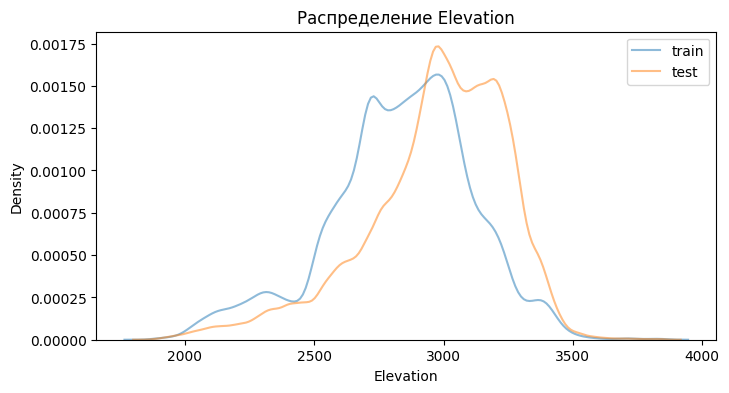

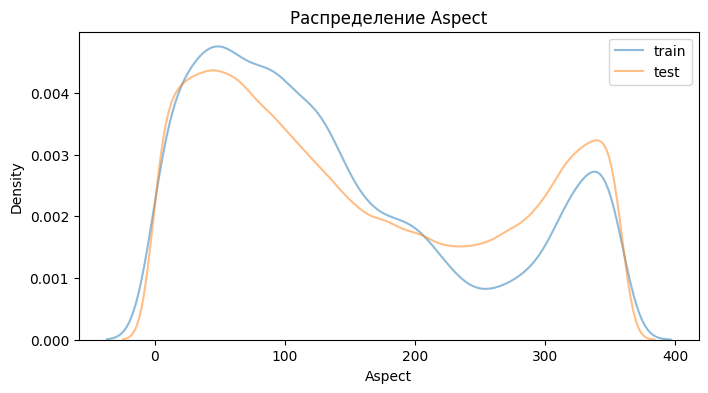

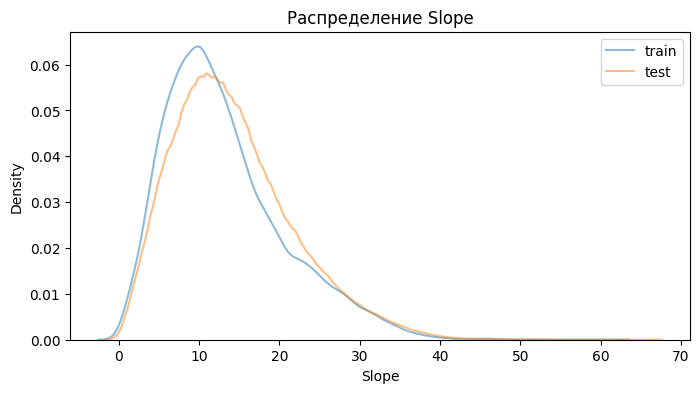

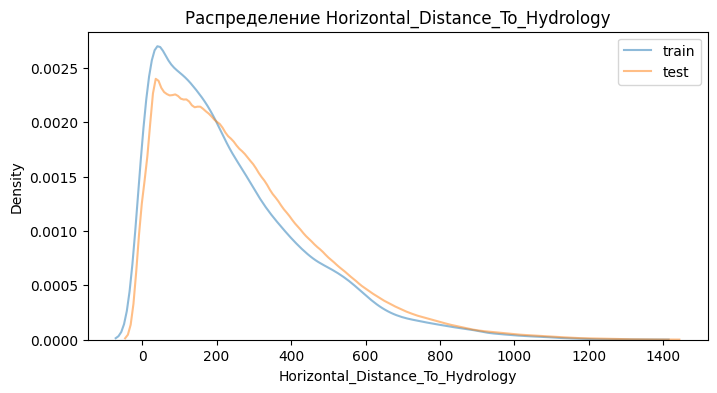

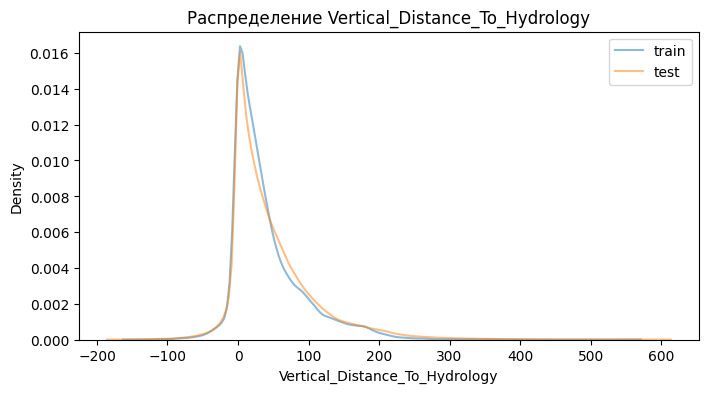


Размер тренировочного набора: (35084, 52)
Размер тестового набора: (15036, 52)
Признаки: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Distance_to_hydrology', 'Shadow_importance', 'FireRoad_diff']

Распределение классов в y_train:
Cover_Type
2    0.576787
1    0.2026